## Importing Librareis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor
#import decision_tree_regressor as dtr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge

In [2]:
#check xgboost version
import xgboost as xgb
print(xgb.__version__)
#check sklearn verison
import sklearn
print(sklearn.__version__)


3.0.0
1.6.1


## Reading Dataset

In [3]:
# Read the data from the xlsx file
df = pd.read_excel('Thalassia hemprichii.xlsx', sheet_name='Sheet1')
df.head()

,FID,latitude_c,longitude_,species,2100AOGCM.RCP85.Surface.Salinity.Mean.,2100AOGCM.RCP85.Surface.Temperature.Max,2100AOGCM.RCP85.Surface.Temperature.Mean,2100AOGCM.RCP85.Surface.Temperature.Min,2100AOGCM.RCP26.Surface.Temperature.Max,2100AOGCM.RCP26.Surface.Temperature.Mean,...,2050AOGCM.RCP26.Surface.Temperature.Mean,2050AOGCM.RCP26.Surface.Temperature.Min,2050AOGCM.RCP85.Surface.Salinity.Mean.,2050AOGCM.RCP85.Surface.Temperature.Max,2050AOGCM.RCP85.Surface.Temperature.Mean,2050AOGCM.RCP85.Surface.Temperature.Min,Present_surface_temperature_min,Present_surface_temperature_mean,Present_surface_temperature_max,Present_surface_salinity
0,0,43.0056,144.8555,Thalassia hemprichii,-0.89614,8.248602,18.897469,32.247695,20.031401,8.23294,...,20.949499,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417
1,1,43.0047,144.8574,Thalassia hemprichii,-0.89614,8.248602,18.897469,32.247695,20.031401,8.23294,...,20.949499,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417
2,2,43.0549,144.9061,Thalassia hemprichii,-0.89614,8.248602,18.897469,32.247695,20.031401,8.23294,...,20.949499,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417
3,3,43.0549,144.9061,Thalassia hemprichii,-0.89614,8.248602,18.897469,32.247695,20.031401,8.23294,...,20.949499,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417
4,4,43.0656,144.9061,Thalassia hemprichii,-0.89614,8.248602,18.897469,32.247695,20.031401,8.23294,...,20.949499,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417


## Cehcking Null values

In [4]:
#checking null values
df.isnull().sum()

FID                                         0
latitude_c                                  0
longitude_                                  0
species                                     0
2100AOGCM.RCP85.Surface.Salinity.Mean.      0
2100AOGCM.RCP85.Surface.Temperature.Max     0
2100AOGCM.RCP85.Surface.Temperature.Mean    0
2100AOGCM.RCP85.Surface.Temperature.Min     0
2100AOGCM.RCP26.Surface.Temperature.Max     0
2100AOGCM.RCP26.Surface.Temperature.Mean    0
2100AOGCM.RCP26.Surface.Temperature.Min     0
2100AOGCM.RCP26.Surface.Salinity.Mean       0
2050AOGCM.RCP26.Surface.Salinity.Mean       0
2050AOGCM.RCP26.Surface.Temperature.Max     0
2050AOGCM.RCP26.Surface.Temperature.Mean    0
2050AOGCM.RCP26.Surface.Temperature.Min     0
2050AOGCM.RCP85.Surface.Salinity.Mean.      0
2050AOGCM.RCP85.Surface.Temperature.Max     0
2050AOGCM.RCP85.Surface.Temperature.Mean    0
2050AOGCM.RCP85.Surface.Temperature.Min     0
Present_surface_temperature_min             0
Present_surface_temperature_mean  

In [5]:
#drop FID
df.drop(['FID'], axis=1, inplace=True)

In [6]:
#shape of the data
df.shape

(80476, 23)

In [7]:
#descriptive statistics
df.describe()

,latitude_c,longitude_,2100AOGCM.RCP85.Surface.Salinity.Mean.,2100AOGCM.RCP85.Surface.Temperature.Max,2100AOGCM.RCP85.Surface.Temperature.Mean,2100AOGCM.RCP85.Surface.Temperature.Min,2100AOGCM.RCP26.Surface.Temperature.Max,2100AOGCM.RCP26.Surface.Temperature.Mean,2100AOGCM.RCP26.Surface.Temperature.Min,2100AOGCM.RCP26.Surface.Salinity.Mean,...,2050AOGCM.RCP26.Surface.Temperature.Mean,2050AOGCM.RCP26.Surface.Temperature.Min,2050AOGCM.RCP85.Surface.Salinity.Mean.,2050AOGCM.RCP85.Surface.Temperature.Max,2050AOGCM.RCP85.Surface.Temperature.Mean,2050AOGCM.RCP85.Surface.Temperature.Min,Present_surface_temperature_min,Present_surface_temperature_mean,Present_surface_temperature_max,Present_surface_salinity
count,80476.000000,80476.000000,80476.000000,80476.000000,80476.000000,80476.000000,80476.000000,80476.000000,80476.000000,80476.000000,...,80476.000000,80476.000000,80476.000000,80476.000000,80476.000000,80476.000000,80476.000000,80476.000000,80476.000000,80476.000000
mean,-11.122172,146.087662,-558.897784,-554.357328,-550.067502,-543.716593,-549.623274,-553.815775,-558.179677,-543.763461,...,-548.897963,-553.304088,-557.782376,-543.763461,-549.623274,-553.815775,-558.179677,-544.029099,-547.256156,-551.735518
std,20.899738,8.347775,2335.346637,2336.467488,2337.526611,2339.096898,2337.636340,2336.601506,2335.524561,2339.085323,...,2337.815750,2336.727935,2335.622920,2339.085323,2337.636340,2336.601506,2335.524561,2339.019589,2338.221651,2337.115516
min,-26.106100,-172.817000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,-23.732395,145.769900,18.922142,23.508783,27.760689,34.935784,28.318800,24.113501,19.683901,34.898601,...,29.108601,24.674200,20.204300,34.898601,28.318800,24.113501,19.683901,34.526100,30.666500,26.226700
50%,-19.240930,146.883055,19.309654,24.291552,28.649300,35.209372,28.989500,24.873301,20.133400,35.156502,...,29.794500,25.453899,20.635799,35.156502,28.989500,24.873301,20.133400,34.844398,31.506701,26.989901
75%,-16.756970,151.160285,21.333714,25.840164,29.506088,35.383730,29.757999,26.357100,22.124201,35.392300,...,30.600901,26.861799,22.628000,35.392300,29.757999,26.357100,22.124201,35.087299,32.194000,28.399099
max,43.067600,173.151500,29.269993,29.969002,32.929131,38.714810,33.506901,30.638201,30.127399,38.760101,...,34.482799,31.276899,30.154600,38.760101,33.506901,30.638201,30.127399,38.766998,36.340000,33.245499


# Checking Distribution

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


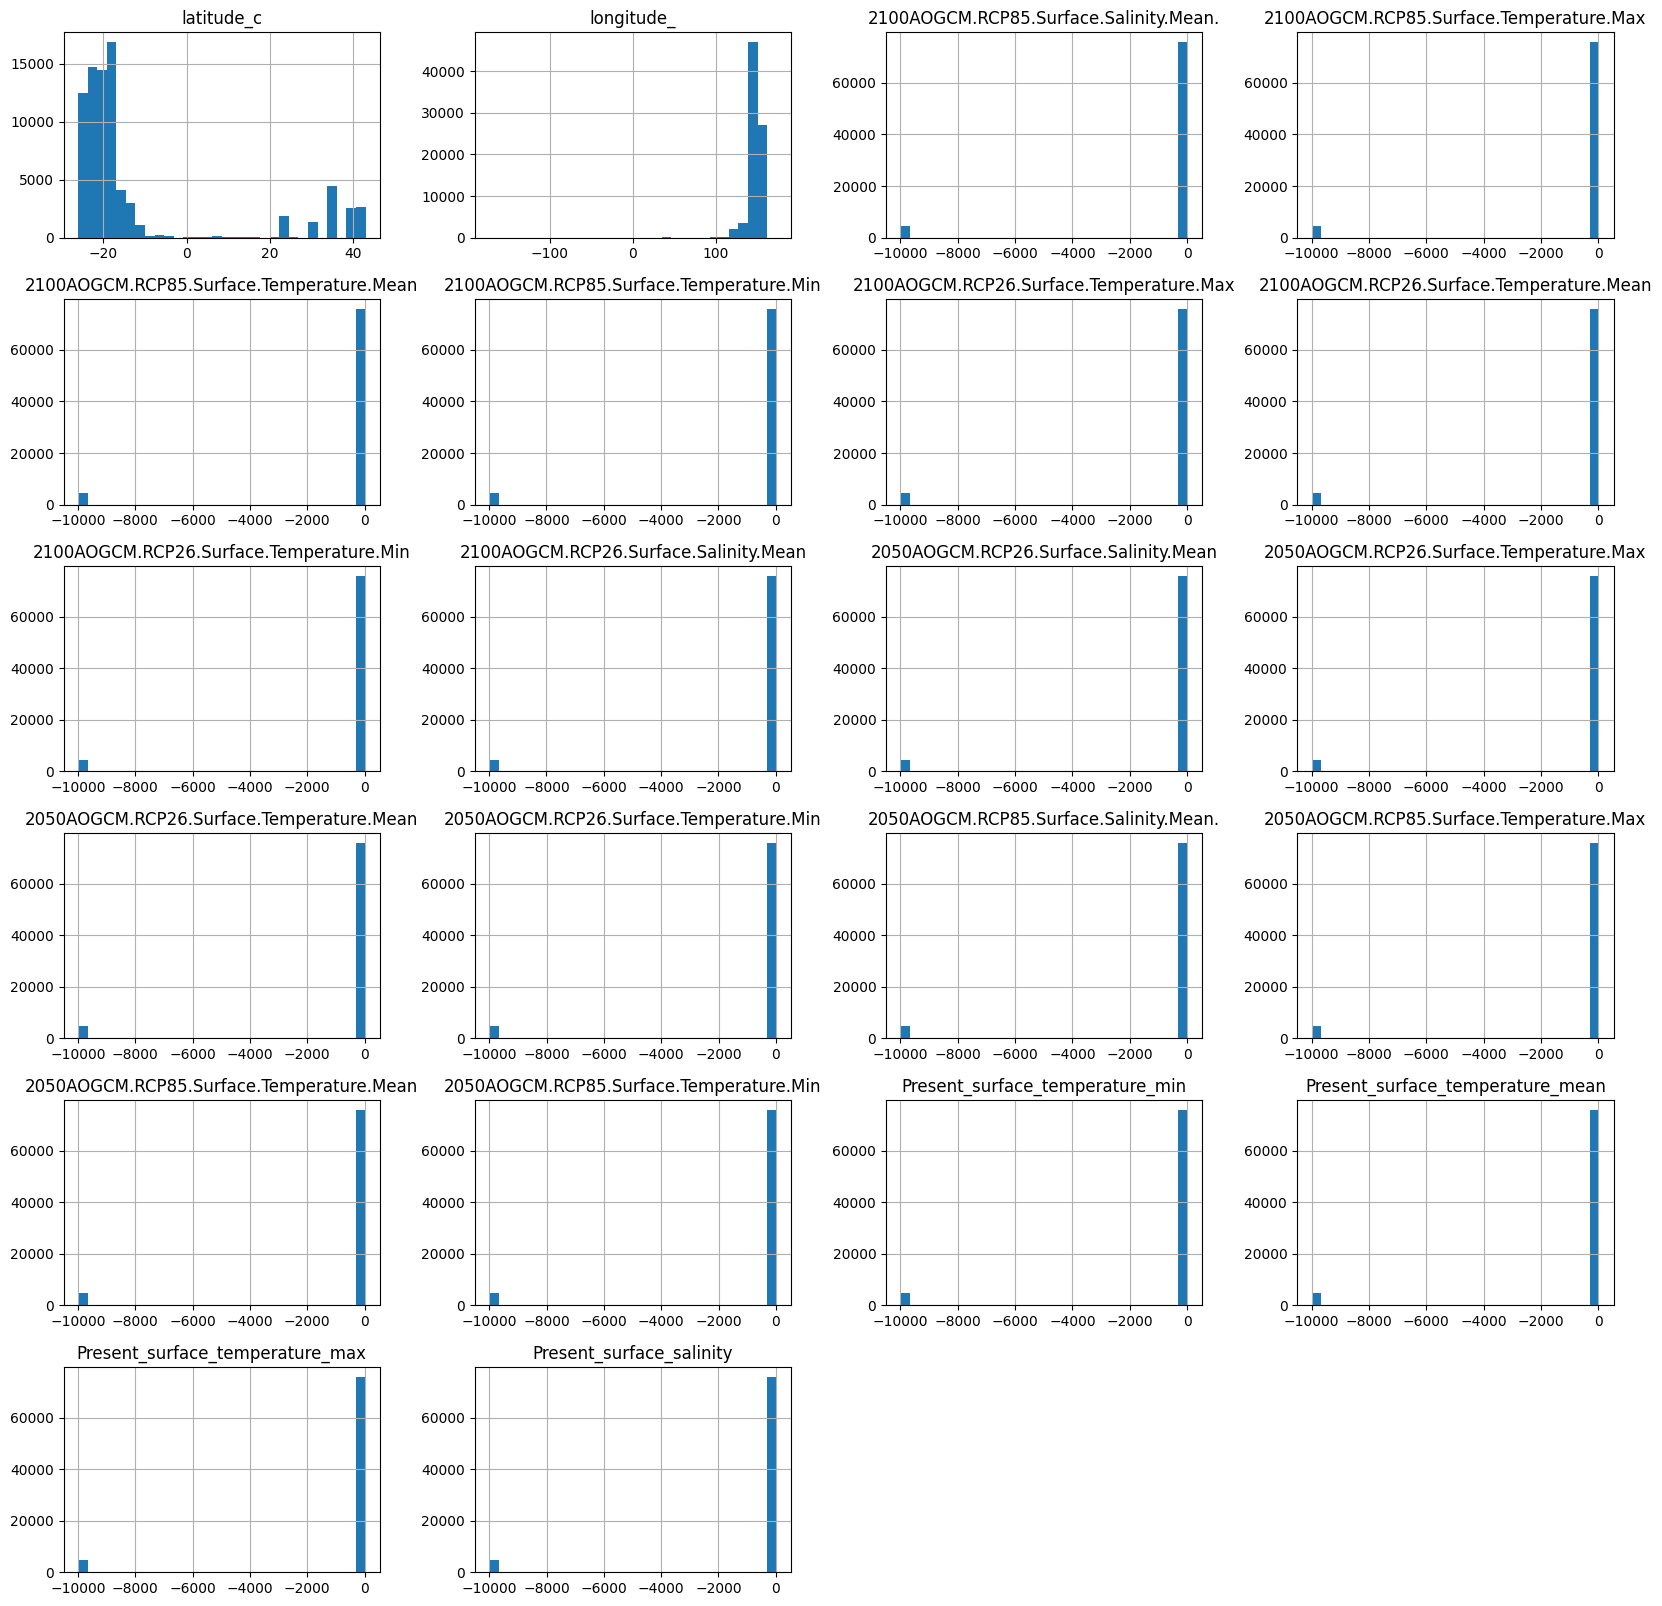

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


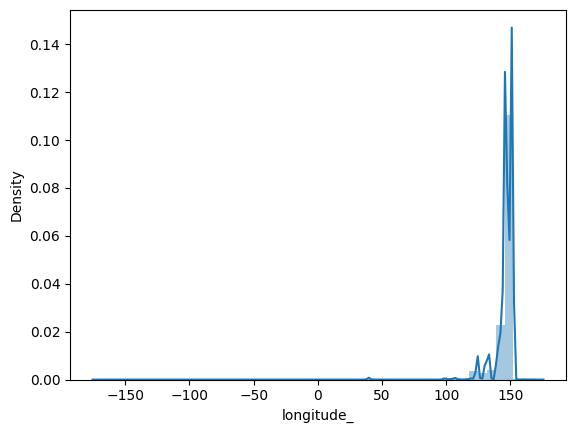

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


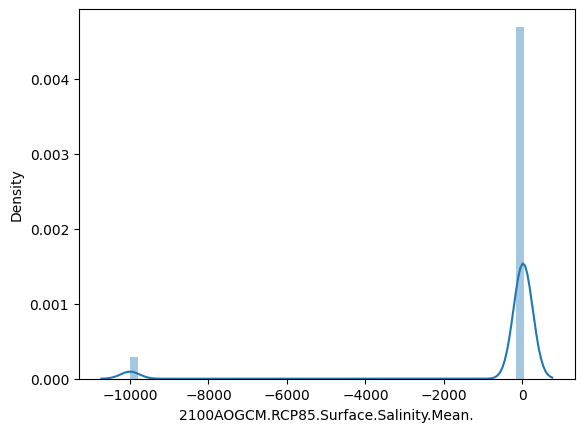

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


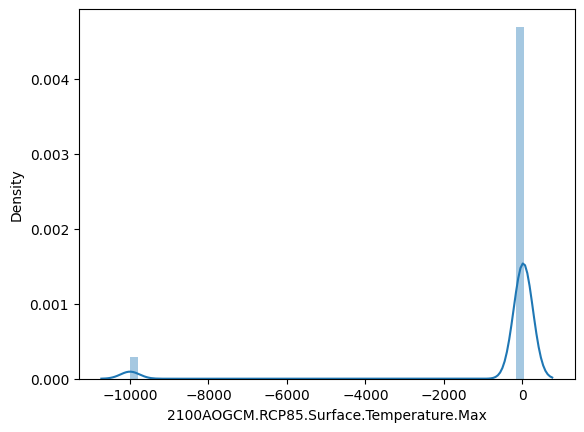

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


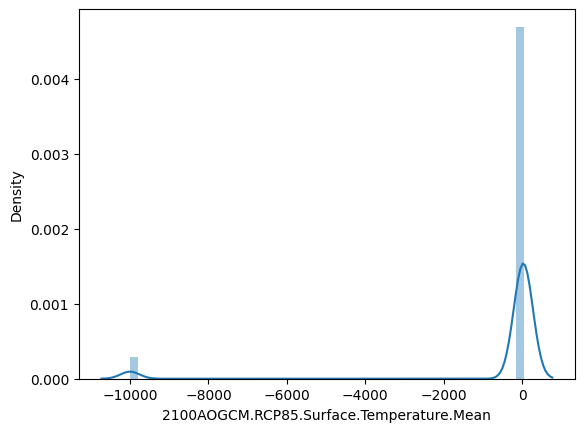

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


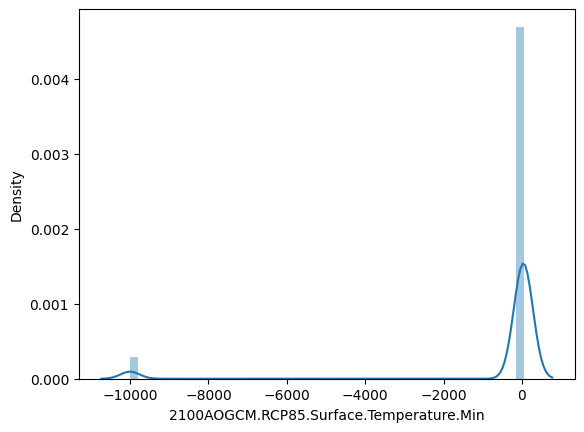

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


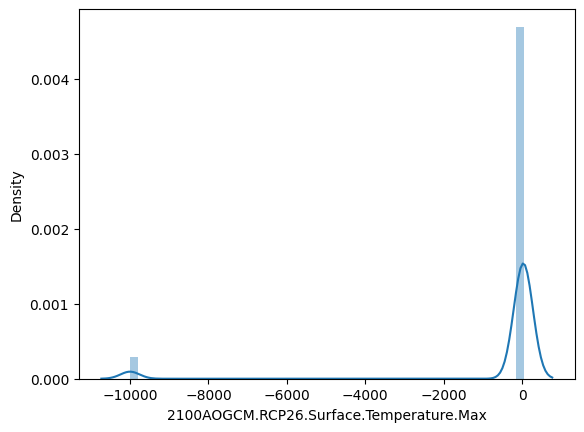

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


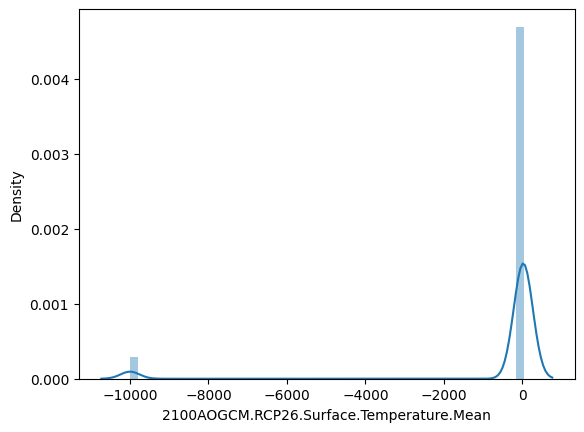

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


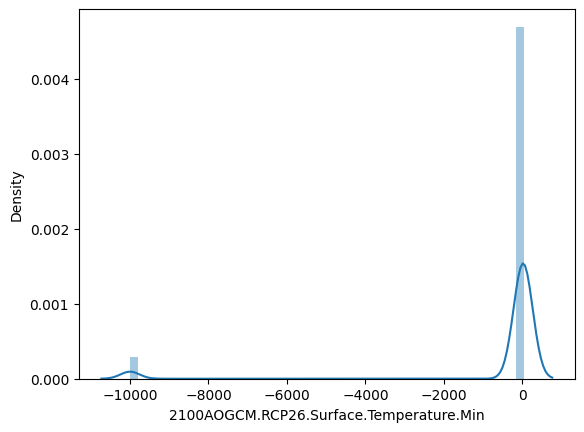

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


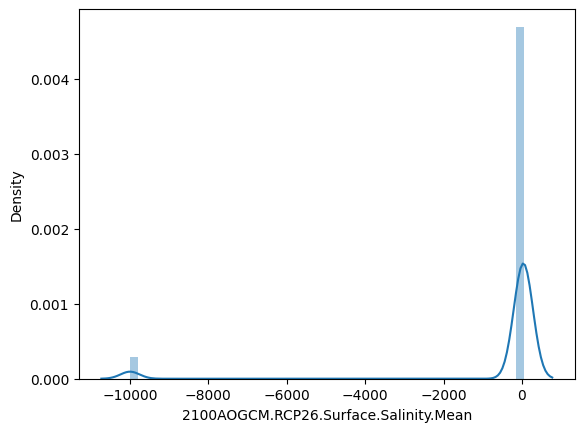

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


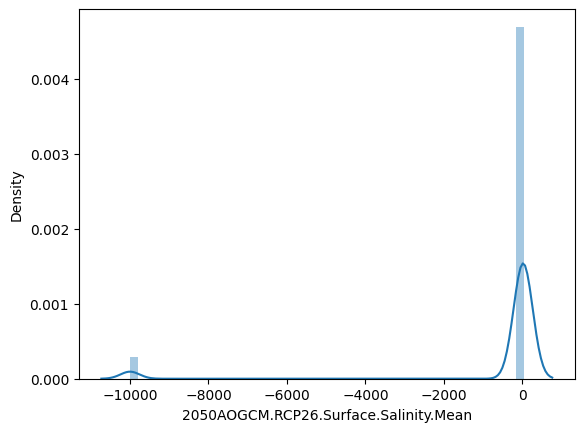

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


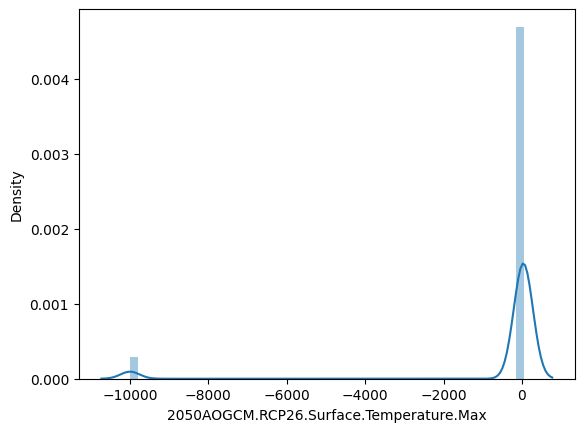

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


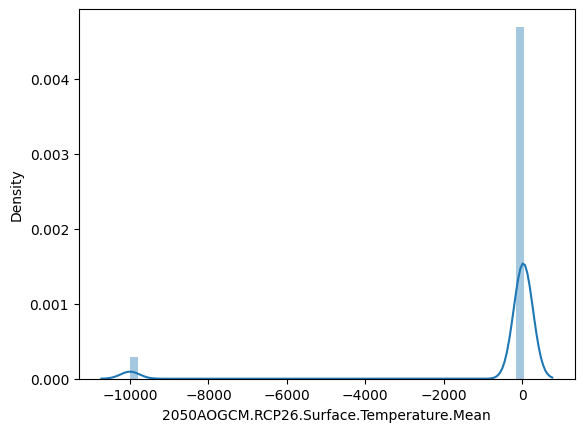

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


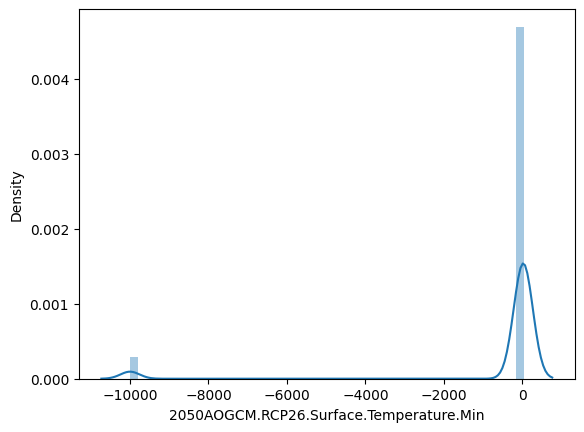

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


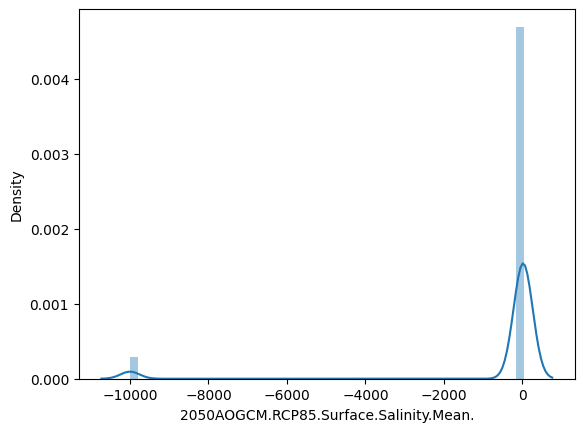

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


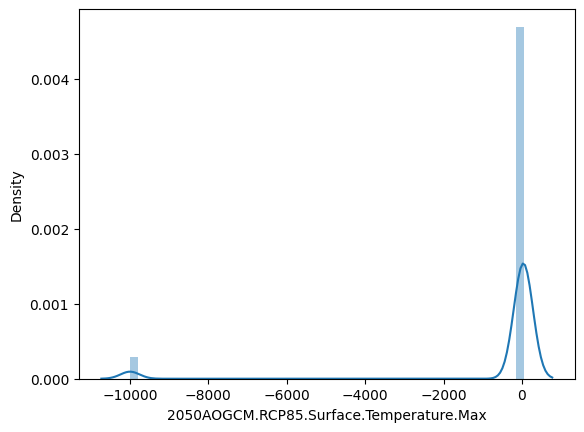

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


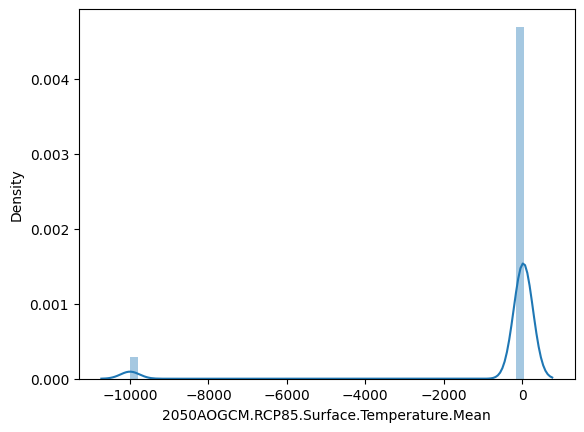

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


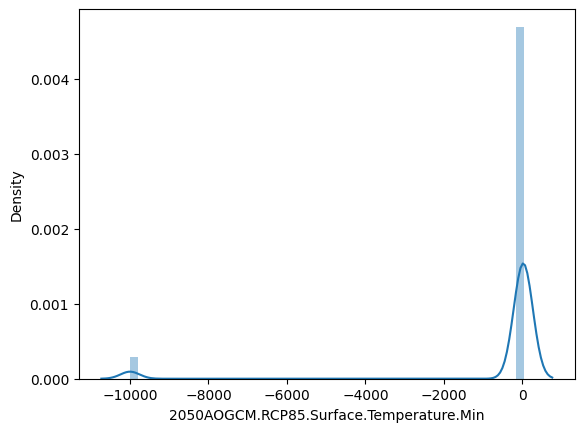

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


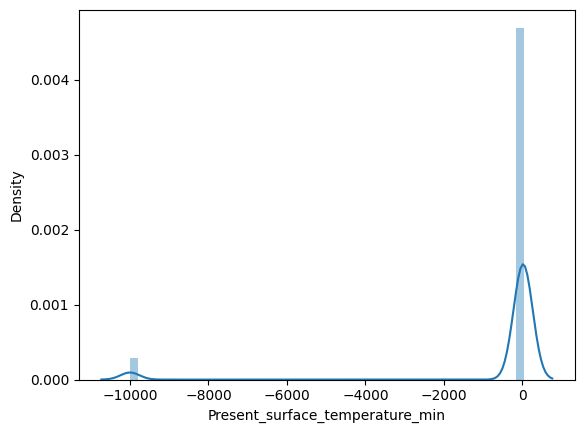

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


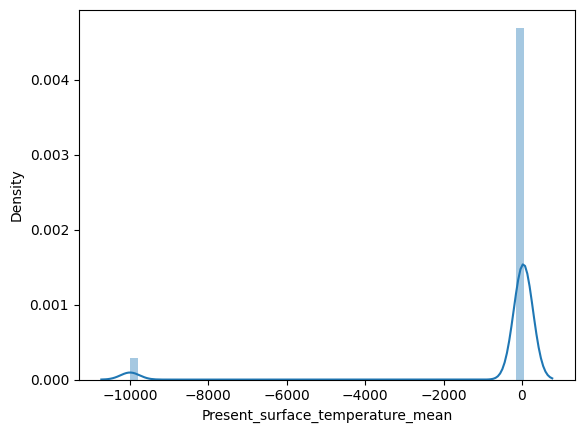

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


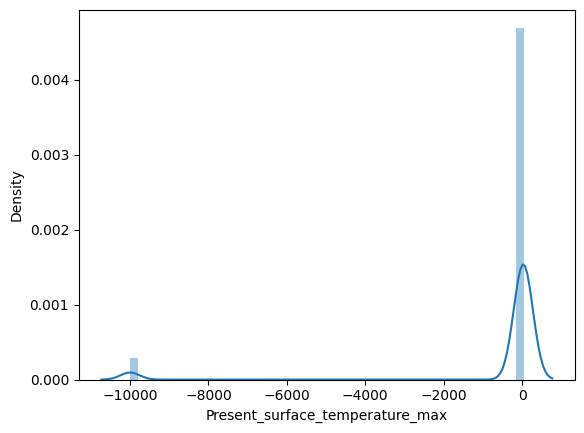

C:\Users\abdul\AppData\Local\Temp\ipykernel_16676\3339240619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


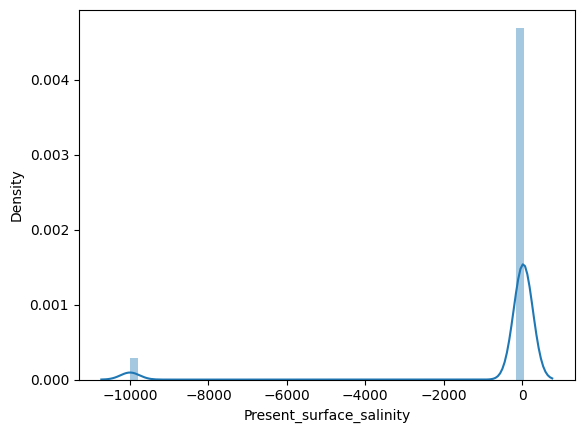

In [8]:
#checking the distribution of all lthe columns using histogram
df.hist(figsize=(20,20), grid=True, layout=(6,4), bins=30)
#checking the distribution of all the numerical columns using distplot
for i in df.columns:
    if df[i].dtype != 'object':
        sns.distplot(df[i])
        plt.show()


In [9]:
#make a copy of df
df1 = df.copy()
df1.head()

,latitude_c,longitude_,species,2100AOGCM.RCP85.Surface.Salinity.Mean.,2100AOGCM.RCP85.Surface.Temperature.Max,2100AOGCM.RCP85.Surface.Temperature.Mean,2100AOGCM.RCP85.Surface.Temperature.Min,2100AOGCM.RCP26.Surface.Temperature.Max,2100AOGCM.RCP26.Surface.Temperature.Mean,2100AOGCM.RCP26.Surface.Temperature.Min,...,2050AOGCM.RCP26.Surface.Temperature.Mean,2050AOGCM.RCP26.Surface.Temperature.Min,2050AOGCM.RCP85.Surface.Salinity.Mean.,2050AOGCM.RCP85.Surface.Temperature.Max,2050AOGCM.RCP85.Surface.Temperature.Mean,2050AOGCM.RCP85.Surface.Temperature.Min,Present_surface_temperature_min,Present_surface_temperature_mean,Present_surface_temperature_max,Present_surface_salinity
0,43.0056,144.8555,Thalassia hemprichii,-0.89614,8.248602,18.897469,32.247695,20.031401,8.23294,-0.789979,...,20.949499,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417
1,43.0047,144.8574,Thalassia hemprichii,-0.89614,8.248602,18.897469,32.247695,20.031401,8.23294,-0.789979,...,20.949499,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417
2,43.0549,144.9061,Thalassia hemprichii,-0.89614,8.248602,18.897469,32.247695,20.031401,8.23294,-0.789979,...,20.949499,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417
3,43.0549,144.9061,Thalassia hemprichii,-0.89614,8.248602,18.897469,32.247695,20.031401,8.23294,-0.789979,...,20.949499,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417
4,43.0656,144.9061,Thalassia hemprichii,-0.89614,8.248602,18.897469,32.247695,20.031401,8.23294,-0.789979,...,20.949499,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417


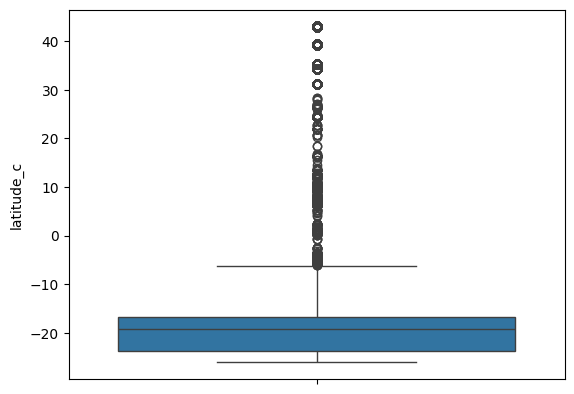

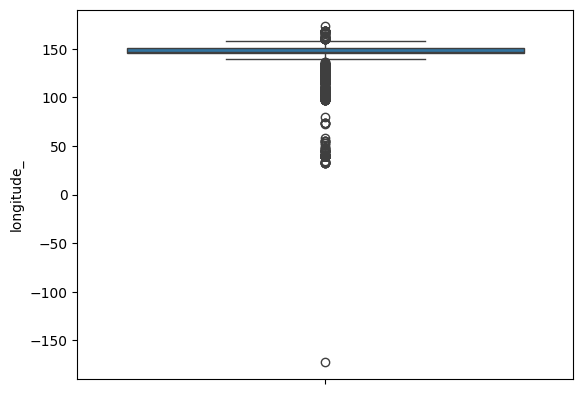

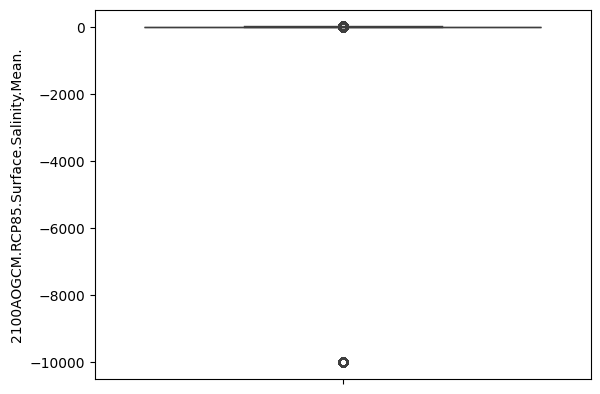

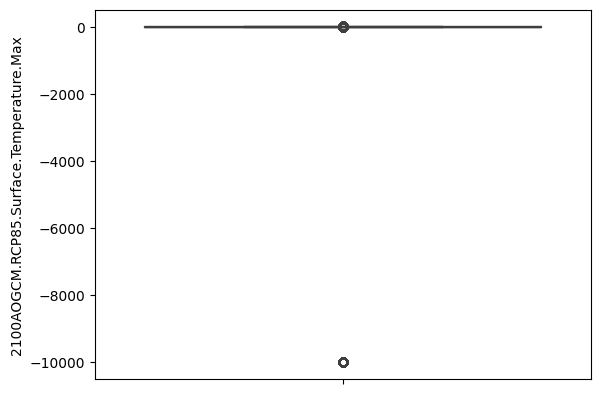

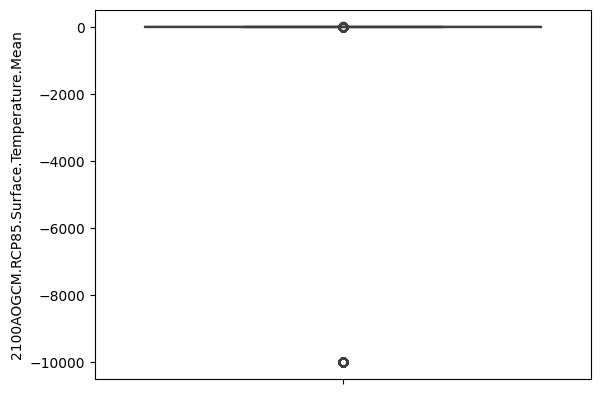

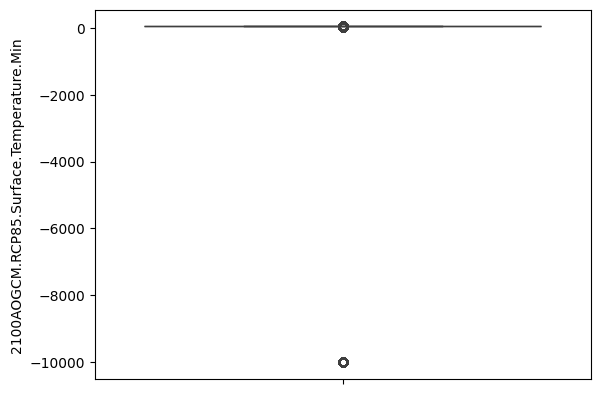

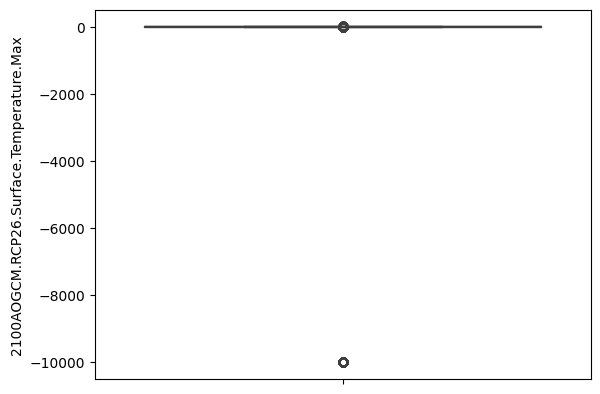

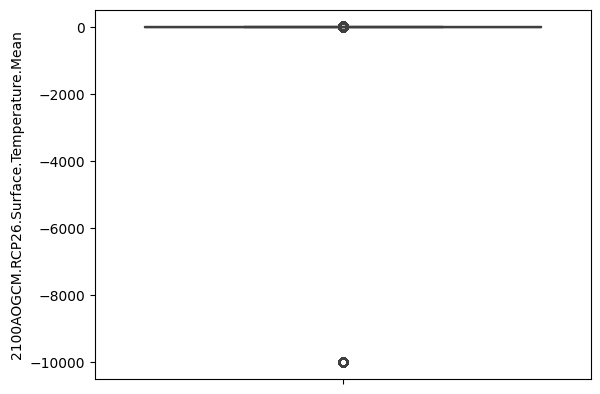

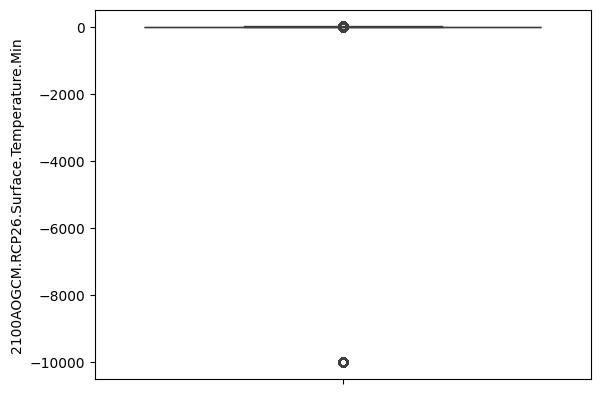

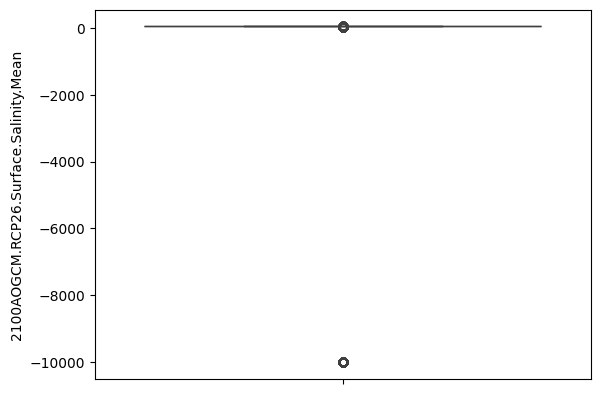

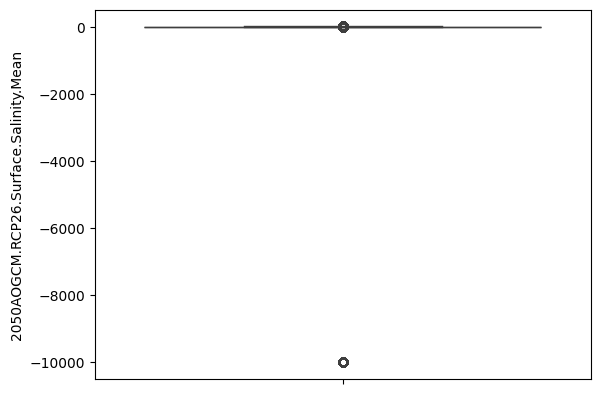

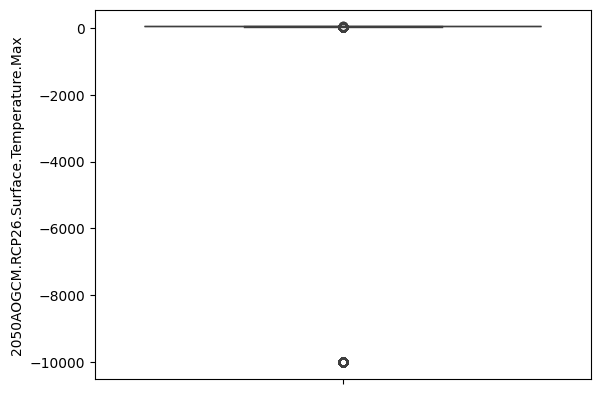

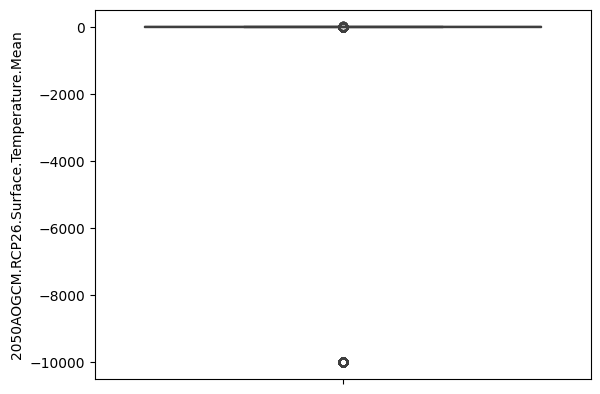

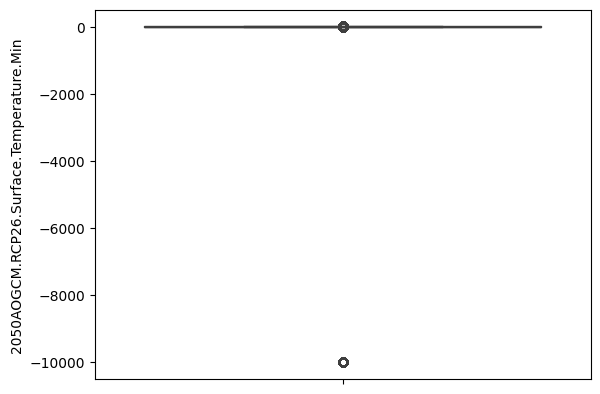

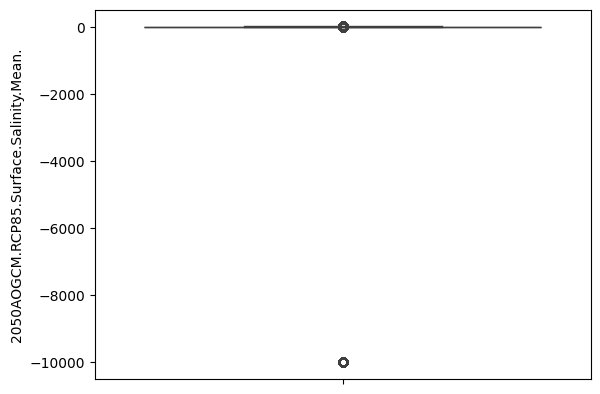

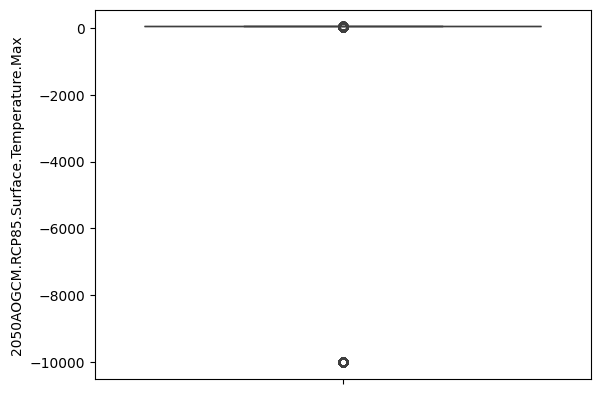

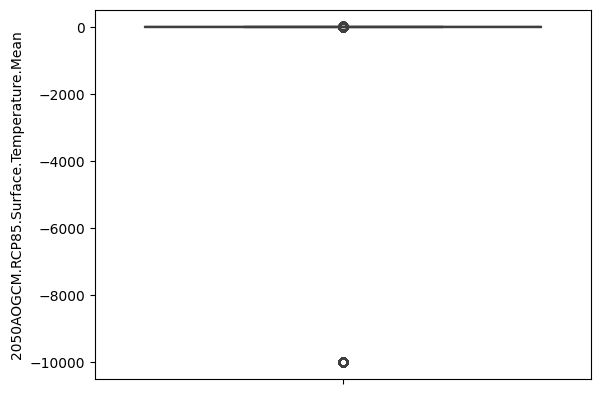

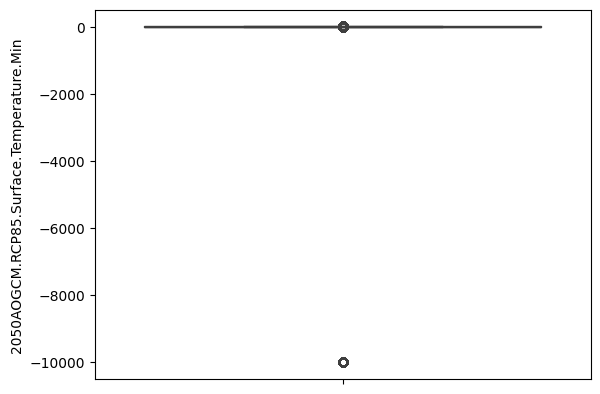

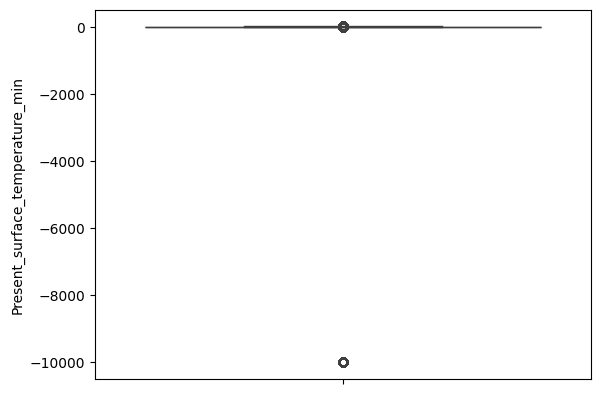

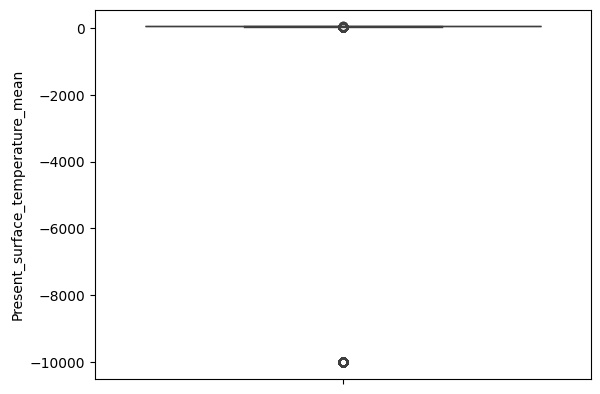

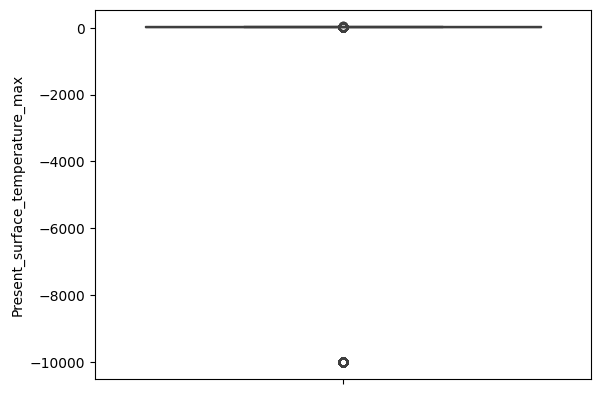

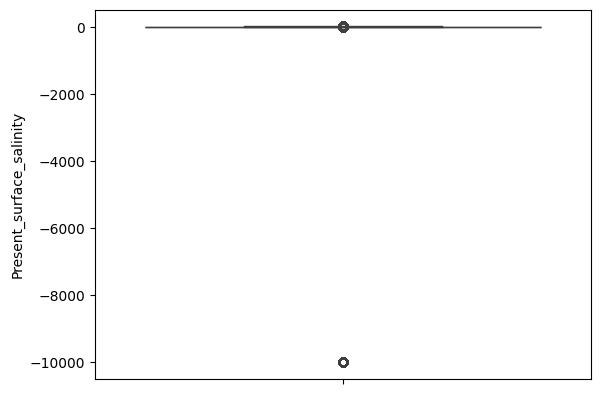

In [10]:
#cheking the distribution of all the columns using boxplot
for i in df1.columns:
    if df1[i].dtype != 'object':
        sns.boxplot(df1[i])
        plt.show()

In [11]:
numeric_cols = df1.select_dtypes(include=[np.number])

# Calculate the IQR for each numeric column
Q1 = numeric_cols.quantile(0.01)
Q3 = numeric_cols.quantile(0.9)
IQR = Q3 - Q1

# Define a multiplier to determine the threshold for outliers
multiplier = 1.5

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - (multiplier * IQR)
upper_bound = Q3 + (multiplier * IQR)

# Identify the outliers using the lower and upper bounds
outliers = ((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)
outlier_indices = outliers[outliers].index

# Remove the outliers from the dataframe
clean_df = df1.drop(outlier_indices)

In [12]:
df.shape

(80476, 23)

In [13]:
clean_df.shape

(80285, 23)

## Current Distribution after removing outliers

In [14]:
# Split the data into input features (X) and output variables (y)
X = clean_df[['Present_surface_temperature_min', 'Present_surface_temperature_mean', 'Present_surface_temperature_max','Present_surface_salinity']]
y = clean_df[['latitude_c', 'longitude_']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# List of machine learning models
models = [RandomForestRegressor(random_state=42), Ridge(), Lasso(), ElasticNet(), LinearRegression(), SVR(), MLPRegressor(), KNeighborsRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(), BaggingRegressor(), ExtraTreesRegressor(), XGBRegressor()]

# Loop through each model
for model in models:
    # Create the MultiOutputRegressor model
    multi_model = MultiOutputRegressor(model)
    
    # Fit the model on the training data
    multi_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = multi_model.predict(X_test)
    
    # Calculate and print the score for each output variable
    for i, target in enumerate(multi_model.estimators_):
        score = target.score(X_test, y_test.iloc[:, i])
        print(f"Score for output variable {i+1} using {type(model).__name__}: {score}")


Score for output variable 1 using RandomForestRegressor: 0.9947814654953246
Score for output variable 2 using RandomForestRegressor: 0.9801904401361342
Score for output variable 1 using Ridge: 0.8814514409072121
Score for output variable 2 using Ridge: 0.6977864135218316


c:\Users\abdul\anaconda3\envs\three_specie\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.313e+07, tolerance: 2.819e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\abdul\anaconda3\envs\three_specie\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.369e+05, tolerance: 2.736e+02
  model = cd_fast.enet_coordinate_descent(


Score for output variable 1 using Lasso: 0.013925449425257641
Score for output variable 2 using Lasso: 0.0061813211809218505


c:\Users\abdul\anaconda3\envs\three_specie\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.352e+07, tolerance: 2.819e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\abdul\anaconda3\envs\three_specie\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.980e+05, tolerance: 2.736e+02
  model = cd_fast.enet_coordinate_descent(


Score for output variable 1 using ElasticNet: 0.013920317603923649
Score for output variable 2 using ElasticNet: 0.006191466317500893
Score for output variable 1 using LinearRegression: 0.8814513786637578
Score for output variable 2 using LinearRegression: 0.697786149577643
Score for output variable 1 using SVR: -0.14423438506554964
Score for output variable 2 using SVR: -0.001489548935091678
Score for output variable 1 using MLPRegressor: 0.9225144050334786
Score for output variable 2 using MLPRegressor: 0.6922387989345522
Score for output variable 1 using KNeighborsRegressor: 0.9942769934946271
Score for output variable 2 using KNeighborsRegressor: 0.9646315867028066
Score for output variable 1 using GradientBoostingRegressor: 0.9944533254228018
Score for output variable 2 using GradientBoostingRegressor: 0.9743271653924088
Score for output variable 1 using AdaBoostRegressor: 0.9744391295195749
Score for output variable 2 using AdaBoostRegressor: 0.8295529978882161
Score for output v

In [16]:
# Create and train the multi-output regression model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

# Print the model's score
print(model.score(X_test, y_test))

0.9874859528157294


In [17]:
#checking score for each output variable
print(model.estimators_[0].score(X_test, y_test.iloc[:,0]))
print(model.estimators_[1].score(X_test, y_test.iloc[:,1]))


0.9947814654953246
0.9801904401361342


In [18]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Create the MultiOutputRegressor model
rf_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf_model = rf_model.predict(X_test)

# Calculate and print the score for each output variable
for i, target in enumerate(model.estimators_):
    score = target.score(X_test, y_test.iloc[:, i])
    print(f"Score for output variable {i+1}: {score}")


Score for output variable 1: 0.9947814654953246
Score for output variable 2: 0.9801904401361342


# without removing outluier the accuracy is rf is:
- Score for output variable 1: 0.9943413480752105
- Score for output variable 2: 0.955976352469888

In [19]:


# Create the MultiOutputRegressor model
xgb_model = MultiOutputRegressor(XGBRegressor(random_state=42))

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb_model = xgb_model.predict(X_test)

# Calculate and print the score for each output variable
for i, target in enumerate(xgb_model.estimators_):
    score = target.score(X_test, y_test.iloc[:, i])
    print(f"Score for output variable {i+1}: {score}")

# #dump model using pickle
# import pickle
# pickle.dump(model, open('xgb_model_one_specie.pkl','wb'))



Score for output variable 1: 0.9946348315101629
Score for output variable 2: 0.979498472241491


In [20]:
# Create the ensemble model by averaging the predictions
ensemble_predictions = (y_pred_rf_model + y_pred_xgb_model) / 2

In [21]:
# Evaluate the mean squared error of individual models
rf_mse = mean_squared_error(y_test, y_pred_rf_model)
xgb_mse = mean_squared_error(y_test, y_pred_xgb_model)
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)

print("Random Forest MSE:", rf_mse)
print("XGBoost MSE:", xgb_mse)
print("Ensemble MSE:", ensemble_mse)


Random Forest MSE: 1.5469560151587713
XGBoost MSE: 1.5932807922363281
Ensemble MSE: 1.5017513371194815


In [22]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Instantiate the individual regression models
rf_model1 = RandomForestRegressor()
xgb_model1 = XGBRegressor()

# Create the voting regressor
voting = MultiOutputRegressor(VotingRegressor(estimators=[('rf', rf_model1), ('xg', xgb_model1)]))

# Fit the voting regressor to the training data
voting.fit(X_train, y_train)


MultiOutputRegressor(estimator=VotingRegressor(estimators=[('rf',
                                                            RandomForestRegressor()),
                                                           ('xg',
                                                            XGBRegressor(base_score=None,
                                                                         booster=None,
                                                                         callbacks=None,
                                                                         colsample_bylevel=None,
                                                                         colsample_bynode=None,
                                                                         colsample_bytree=None,
                                                                         device=None,
                                                                         early_stopping_rounds=None,
                                                                         enable_categorical=False,
                                                                         eval_metric=None,
                                                                         feature_types=None,
                                                                         feature_weights=None,
                                                                         gamma=None,
                                                                         grow_policy=None,
                                                                         importance_type=None,
                                                                         interaction_constraints=None,
                                                                         learning_rate=None,
                                                                         max_bin=None,
                                                                         max_cat_threshold=None,
                                                                         max_cat_to_onehot=None,
                                                                         max_delta_step=None,
                                                                         max_depth=None,
                                                                         max_leaves=None,
                                                                         min_child_weight=None,
                                                                         missing=nan,
                                                                         monotone_constraints=None,
                                                                         multi_strategy=None,
                                                                         n_estimators=None,
                                                                         n_jobs=None,
                                                                         num_parallel_tree=None, ...))]))

In [23]:
# predict on the test data
y_pred_voting = voting.predict(X_test)

#eva;ute the score for each output variable
for i, target in enumerate(voting.estimators_):
    score = target.score(X_test, y_test.iloc[:, i])
    print(f"Score for output variable {i+1}: {score}")

# Calculate and print the score for the combined model
score_voting = voting.score(X_test, y_test)
print(f"Voting Score: {score_voting}")

Score for output variable 1: 0.9949156695822037
Score for output variable 2: 0.9809156491016277
Voting Score: 0.9879156593419156


In [24]:
#check mse
voting_mse = mean_squared_error(y_test, y_pred_voting)
print("Voting MSE:", voting_mse)

Voting MSE: 1.5026178653595026


In [25]:
#dump model using pickle
import pickle
pickle.dump(voting, open('voting_thalassia_current_distribution','wb'))

__________

# predictinf futreu of 2050

# 50 correct prediciton

In [26]:
# 2050AOGCM.RCP26.Surface.Salinity.Mean       0
# 2050AOGCM.RCP26.Surface.Temperature.Max     0
# 2050AOGCM.RCP26.Surface.Temperature.Mean    0
# 2050AOGCM.RCP26.Surface.Temperature.Min     0
# 2050AOGCM.RCP85.Surface.Salinity.Mean.      0
# 2050AOGCM.RCP85.Surface.Temperature.Max     0
# 2050AOGCM.RCP85.Surface.Temperature.Mean    0
# 2050AOGCM.RCP85.Surface.Temperature.Min     0

In [27]:
# Split the data into input features (X) and output variables (y)
X_50 = clean_df[['2050AOGCM.RCP26.Surface.Salinity.Mean', '2050AOGCM.RCP26.Surface.Temperature.Max', '2050AOGCM.RCP26.Surface.Temperature.Mean','2050AOGCM.RCP26.Surface.Temperature.Min','2050AOGCM.RCP85.Surface.Salinity.Mean.',
'2050AOGCM.RCP85.Surface.Temperature.Max','2050AOGCM.RCP85.Surface.Temperature.Mean','2050AOGCM.RCP85.Surface.Temperature.Min']]
y_50 = clean_df[['latitude_c', 'longitude_']]

# Split the data into training and testing sets
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X_50, y_50, test_size=0.2)

In [28]:
# List of machine learning models
models = [RandomForestRegressor(random_state=42), Ridge(), Lasso(), ElasticNet(), LinearRegression(), SVR(), MLPRegressor(), KNeighborsRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(), BaggingRegressor(), ExtraTreesRegressor(), XGBRegressor()]

# Loop through each model
for model in models:
    # Create the MultiOutputRegressor model
    multi_model = MultiOutputRegressor(model)
    
    # Fit the model on the training data
    multi_model.fit(X_train_50, y_train_50)
    
    # Predict on the test data
    y_pred = multi_model.predict(X_test_50)
    
    # Calculate and print the score for each output variable
    for i, target in enumerate(multi_model.estimators_):
        score = target.score(X_test_50, y_test_50.iloc[:, i])
        print(f"Score for output variable {i+1} using {type(model).__name__}: {score}")


Score for output variable 1 using RandomForestRegressor: 0.9964017573442225
Score for output variable 2 using RandomForestRegressor: 0.9748011039759779
Score for output variable 1 using Ridge: 0.9588888921831934
Score for output variable 2 using Ridge: 0.8495600081773578


c:\Users\abdul\anaconda3\envs\three_specie\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.318e+07, tolerance: 2.810e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\abdul\anaconda3\envs\three_specie\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.679e+05, tolerance: 2.726e+02
  model = cd_fast.enet_coordinate_descent(


Score for output variable 1 using Lasso: 0.016622922843841148
Score for output variable 2 using Lasso: 0.006478831263698748


c:\Users\abdul\anaconda3\envs\three_specie\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.351e+07, tolerance: 2.810e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\abdul\anaconda3\envs\three_specie\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.221e+05, tolerance: 2.726e+02
  model = cd_fast.enet_coordinate_descent(


Score for output variable 1 using ElasticNet: 0.016624088862996156
Score for output variable 2 using ElasticNet: 0.006515015232227639
Score for output variable 1 using LinearRegression: 0.9585474170912328
Score for output variable 2 using LinearRegression: 0.8494090557334038
Score for output variable 1 using SVR: -0.1492696945248806
Score for output variable 2 using SVR: -0.0035303817047829256
Score for output variable 1 using MLPRegressor: 0.9416867573674482
Score for output variable 2 using MLPRegressor: -11.654519203000444
Score for output variable 1 using KNeighborsRegressor: 0.9944246017850757
Score for output variable 2 using KNeighborsRegressor: 0.962885698865639
Score for output variable 1 using GradientBoostingRegressor: 0.9962002742423162
Score for output variable 2 using GradientBoostingRegressor: 0.9715916559859142
Score for output variable 1 using AdaBoostRegressor: 0.9715229853432162
Score for output variable 2 using AdaBoostRegressor: 0.8528123812364076
Score for output 

In [29]:
# Create and train the multi-output regression model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train_50, y_train_50)

# Print the model's score
print(model.score(X_test_50, y_test_50))

0.9856014306601002


In [30]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Create the MultiOutputRegressor model
rf_model_50 = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# Fit the model on the training data
rf_model_50.fit(X_train_50, y_train_50)

# Predict on the test data
y_pred_rf_model_50 = rf_model_50.predict(X_test_50)

# Calculate and print the score for each output variable
for i, target in enumerate(rf_model_50.estimators_):
    score_50 = target.score(X_test_50, y_test_50.iloc[:, i])
    print(f"Score for output variable {i+1}: {score_50}")


Score for output variable 1: 0.9964017573442225
Score for output variable 2: 0.9748011039759779


In [31]:
# Create the MultiOutputRegressor model
xgb_model_50 = MultiOutputRegressor(XGBRegressor(random_state=42))

# Fit the model on the training data
xgb_model_50.fit(X_train_50, y_train_50)

# Predict on the test data
y_pred_xgb_model_50 = xgb_model_50.predict(X_test_50)

# Calculate and print the score for each output variable
for i, target in enumerate(xgb_model_50.estimators_):
    score_50 = target.score(X_test_50, y_test_50.iloc[:, i])
    print(f"Score for output variable {i+1}: {score_50}")


Score for output variable 1: 0.996306947075997
Score for output variable 2: 0.9731195033331982


In [32]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Instantiate the individual regression models
rf_model2 = RandomForestRegressor()
xgb_model2 = XGBRegressor()

# Create the voting regressor
voting = MultiOutputRegressor(VotingRegressor(estimators=[('rf', rf_model2), ('xg', xgb_model2)]))

# Fit the voting regressor to the training data
voting.fit(X_train_50, y_train_50)


MultiOutputRegressor(estimator=VotingRegressor(estimators=[('rf',
                                                            RandomForestRegressor()),
                                                           ('xg',
                                                            XGBRegressor(base_score=None,
                                                                         booster=None,
                                                                         callbacks=None,
                                                                         colsample_bylevel=None,
                                                                         colsample_bynode=None,
                                                                         colsample_bytree=None,
                                                                         device=None,
                                                                         early_stopping_rounds=None,
                                                                         enable_categorical=False,
                                                                         eval_metric=None,
                                                                         feature_types=None,
                                                                         feature_weights=None,
                                                                         gamma=None,
                                                                         grow_policy=None,
                                                                         importance_type=None,
                                                                         interaction_constraints=None,
                                                                         learning_rate=None,
                                                                         max_bin=None,
                                                                         max_cat_threshold=None,
                                                                         max_cat_to_onehot=None,
                                                                         max_delta_step=None,
                                                                         max_depth=None,
                                                                         max_leaves=None,
                                                                         min_child_weight=None,
                                                                         missing=nan,
                                                                         monotone_constraints=None,
                                                                         multi_strategy=None,
                                                                         n_estimators=None,
                                                                         n_jobs=None,
                                                                         num_parallel_tree=None, ...))]))

In [33]:
# predict on the test data
y_pred_voting = voting.predict(X_test_50)

#eva;ute the score for each output variable
for i, target in enumerate(voting.estimators_):
    score = target.score(X_test_50, y_test_50.iloc[:, i])
    print(f"Score for output variable {i+1}: {score}")

# Calculate and print the score for the combined model
score_voting = voting.score(X_test_50, y_test_50)
print(f"Voting Score: {score_voting}")

Score for output variable 1: 0.9964594340386065
Score for output variable 2: 0.9748068278036395
Voting Score: 0.985633130921123


In [34]:
#mse for three models
rf_mse_50 = mean_squared_error(y_test_50, y_pred_rf_model_50)
xgb_mse_50 = mean_squared_error(y_test_50, y_pred_xgb_model_50)
voting_mse_50 = mean_squared_error(y_test_50, y_pred_voting)

print("Random Forest MSE:", rf_mse_50)
print("XGBoost MSE:", xgb_mse_50)
print("Ensemble MSE:", voting_mse_50)

Random Forest MSE: 1.328614276946891
XGBoost MSE: 1.3854155540466309
Ensemble MSE: 1.3158454148287704


In [35]:

#dump model using pickle
import pickle
pickle.dump(xgb_model_50, open('xgb_thalassia_2050','wb'))

_______

# 2100

In [36]:
# 2100AOGCM.RCP85.Surface.Salinity.Mean.      0
# 2100AOGCM.RCP85.Surface.Temperature.Max     0
# 2100AOGCM.RCP85.Surface.Temperature.Mean    0
# 2100AOGCM.RCP85.Surface.Temperature.Min     0
# 2100AOGCM.RCP26.Surface.Temperature.Max     0
# 2100AOGCM.RCP26.Surface.Temperature.Mean    0
# 2100AOGCM.RCP26.Surface.Temperature.Min     0
# 2100AOGCM.RCP26.Surface.Salinity.Mean

In [37]:
# Split the data into input features (X) and output variables (y)
X_100 = clean_df[['2100AOGCM.RCP85.Surface.Salinity.Mean.', '2100AOGCM.RCP85.Surface.Temperature.Max', '2100AOGCM.RCP85.Surface.Temperature.Mean','2100AOGCM.RCP85.Surface.Temperature.Min','2100AOGCM.RCP26.Surface.Temperature.Max',
'2100AOGCM.RCP26.Surface.Temperature.Mean','2100AOGCM.RCP26.Surface.Temperature.Min','2100AOGCM.RCP26.Surface.Salinity.Mean']]
y_100 = clean_df[['latitude_c', 'longitude_']]

# Split the data into training and testing sets
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_100, y_100, test_size=0.2)

In [38]:
# List of machine learning models
models = [RandomForestRegressor(random_state=42), Ridge(), Lasso(), ElasticNet(), LinearRegression(), SVR(), MLPRegressor(), KNeighborsRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(), BaggingRegressor(), ExtraTreesRegressor(), XGBRegressor()]

# Loop through each model
for model in models:
    # Create the MultiOutputRegressor model
    multi_model = MultiOutputRegressor(model)
    
    # Fit the model on the training data
    multi_model.fit(X_train_100, y_train_100)
    
    # Predict on the test data
    y_pred = multi_model.predict(X_test_100)
    
    # Calculate and print the score for each output variable
    for i, target in enumerate(multi_model.estimators_):
        score = target.score(X_test_100, y_test_100.iloc[:, i])
        print(f"Score for output variable {i+1} using {type(model).__name__}: {score}")


Score for output variable 1 using RandomForestRegressor: 0.9958291386218394
Score for output variable 2 using RandomForestRegressor: 0.9684807970495313
Score for output variable 1 using Ridge: 0.9653872387115371
Score for output variable 2 using Ridge: 0.8494044662234758


c:\Users\abdul\anaconda3\envs\three_specie\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.347e+07, tolerance: 2.826e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\abdul\anaconda3\envs\three_specie\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.278e+05, tolerance: 2.767e+02
  model = cd_fast.enet_coordinate_descent(


Score for output variable 1 using Lasso: 0.014470884416998064
Score for output variable 2 using Lasso: 0.0044897057115348415


c:\Users\abdul\anaconda3\envs\three_specie\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+07, tolerance: 2.826e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\abdul\anaconda3\envs\three_specie\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.065e+06, tolerance: 2.767e+02
  model = cd_fast.enet_coordinate_descent(


Score for output variable 1 using ElasticNet: 0.014491905997288668
Score for output variable 2 using ElasticNet: 0.004515745928715398
Score for output variable 1 using LinearRegression: 0.9652973184484537
Score for output variable 2 using LinearRegression: 0.8493107420124744
Score for output variable 1 using SVR: -0.14066158846129073
Score for output variable 2 using SVR: -0.0010987186231263824
Score for output variable 1 using MLPRegressor: 0.9194992800628611
Score for output variable 2 using MLPRegressor: -0.45484614303472437
Score for output variable 1 using KNeighborsRegressor: 0.9958176407482261
Score for output variable 2 using KNeighborsRegressor: 0.9679386958836517
Score for output variable 1 using GradientBoostingRegressor: 0.9955277840473964
Score for output variable 2 using GradientBoostingRegressor: 0.9647333923989697
Score for output variable 1 using AdaBoostRegressor: 0.9729940915407955
Score for output variable 2 using AdaBoostRegressor: 0.8111032535293478
Score for outp

In [39]:
# Create and train the multi-output regression model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train_100, y_train_100)

# Print the model's score
print(model.score(X_test_100, y_test_100))

0.9821549678356853


In [40]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Create the MultiOutputRegressor model
rf_model_100 = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# Fit the model on the training data
rf_model_100.fit(X_train_100, y_train_100)

# Predict on the test data
y_pred_rf_model_100 = rf_model_100.predict(X_test_100)

# Calculate and print the score for each output variable
for i, target in enumerate(rf_model_100.estimators_):
    score_100 = target.score(X_test_100, y_test_100.iloc[:, i])
    print(f"Score for output variable {i+1}: {score_100}")


Score for output variable 1: 0.9958291386218394
Score for output variable 2: 0.9684807970495313


In [41]:
# Create the MultiOutputRegressor model
xgb_model_100 = MultiOutputRegressor(XGBRegressor(random_state=42))

# Fit the model on the training data
xgb_model_100.fit(X_train_100, y_train_100)

# Predict on the test data
y_pred_xgb_model_100 = xgb_model_100.predict(X_test_100)

# Calculate and print the score for each output variable
for i, target in enumerate(xgb_model_100.estimators_):
    score_100 = target.score(X_test_100, y_test_100.iloc[:, i])
    print(f"Score for output variable {i+1}: {score_100}")


Score for output variable 1: 0.9956787048241272
Score for output variable 2: 0.9649003456714581


In [42]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Instantiate the individual regression models
rf_model3 = RandomForestRegressor()
xgb_model3 = XGBRegressor()

# Create the voting regressor
voting = MultiOutputRegressor(VotingRegressor(estimators=[('rf', rf_model3), ('xg', xgb_model3)]))

# Fit the voting regressor to the training data
voting.fit(X_train_100, y_train_100)


MultiOutputRegressor(estimator=VotingRegressor(estimators=[('rf',
                                                            RandomForestRegressor()),
                                                           ('xg',
                                                            XGBRegressor(base_score=None,
                                                                         booster=None,
                                                                         callbacks=None,
                                                                         colsample_bylevel=None,
                                                                         colsample_bynode=None,
                                                                         colsample_bytree=None,
                                                                         device=None,
                                                                         early_stopping_rounds=None,
                                                                         enable_categorical=False,
                                                                         eval_metric=None,
                                                                         feature_types=None,
                                                                         feature_weights=None,
                                                                         gamma=None,
                                                                         grow_policy=None,
                                                                         importance_type=None,
                                                                         interaction_constraints=None,
                                                                         learning_rate=None,
                                                                         max_bin=None,
                                                                         max_cat_threshold=None,
                                                                         max_cat_to_onehot=None,
                                                                         max_delta_step=None,
                                                                         max_depth=None,
                                                                         max_leaves=None,
                                                                         min_child_weight=None,
                                                                         missing=nan,
                                                                         monotone_constraints=None,
                                                                         multi_strategy=None,
                                                                         n_estimators=None,
                                                                         n_jobs=None,
                                                                         num_parallel_tree=None, ...))]))

In [43]:
# predict on the test data
y_pred_voting = voting.predict(X_test_100)

#eva;ute the score for each output variable
for i, target in enumerate(voting.estimators_):
    score = target.score(X_test_100, y_test_100.iloc[:, i])
    print(f"Score for output variable {i+1}: {score}")

# Calculate and print the score for the combined model
score_voting = voting.score(X_test_100, y_test_100)
print(f"Voting Score: {score_voting}")

Score for output variable 1: 0.9958082632994056
Score for output variable 2: 0.967689289554154
Voting Score: 0.9817487764267798


In [44]:
#mse for three models
rf_mse_100 = mean_squared_error(y_test_100, y_pred_rf_model_100)
xgb_mse_100 = mean_squared_error(y_test_100, y_pred_xgb_model_100)
voting_mse_100 = mean_squared_error(y_test_100, y_pred_voting)

print("Random Forest MSE:", rf_mse_100)
print("XGBoost MSE:", xgb_mse_100)
print("Ensemble MSE:", voting_mse_100)

Random Forest MSE: 1.527389175953902
XGBoost MSE: 1.6316430568695068
Ensemble MSE: 1.547784592973345


In [45]:
#dump model using pickle
import pickle
pickle.dump(xgb_model_100, open('xgb_thalassia_2100','wb'))